# Part I - (Dataset Exploration Title)
## by Tobias Groeschner

## Introduction
This ProsperLoan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#Load dataset 
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


### What is the structure of your dataset?

> 113937 rows, 81 columns

### What is/are the main feature(s) of interest in your dataset?

> columns in scope are:

        - 'LoanStatus',
        - 'EstimatedEffectiveYield',
        - 'BorrowerAPR',
        - 'BorrowerRate',
        - 'ProsperScore',  
        - ProsperRating_Alpha        
        - 'EmploymentStatus',
        - 'Occupation',
        - 'IsBorrowerHomeowner',
        - 'IncomeVerifiable',
        - 'StatedMonthlyIncome',
        - 'MonthlyLoanPayment',
        - 'Recommendations',
        - 'DebtToIncomeRatio', 
        - 'LoanOriginalAmount', 
        - 'PercentFunded', 
        - 'IncomeRange',
        - 'BorrowerState, 
        - ListingCategory_Numeric


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> see above

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



In [4]:
cols = ['Term', 
        'LoanStatus', 
        'EstimatedEffectiveYield' ,  
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperScore',
        "ProsperRating (Alpha)",                  
        'EmploymentStatus',
        'Occupation',  
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'BorrowerState']

df = df[cols]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   EstimatedEffectiveYield  84853 non-null   float64
 3   BorrowerAPR              113912 non-null  float64
 4   BorrowerRate             113937 non-null  float64
 5   ProsperScore             84853 non-null   float64
 6   ProsperRating (Alpha)    84853 non-null   object 
 7   EmploymentStatus         111682 non-null  object 
 8   Occupation               110349 non-null  object 
 9   IsBorrowerHomeowner      113937 non-null  bool   
 10  IncomeVerifiable         113937 non-null  bool   
 11  StatedMonthlyIncome      113937 non-null  float64
 12  MonthlyLoanPayment       113937 non-null  float64
 13  DebtToIncomeRatio        105383 non-null  float64
 14  Loan

In [6]:
#dropnas
df = df.dropna()

In [7]:
#basic data exploration
df.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperScore,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded
count,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000,76224.000000
mean,42.760076,0.166737,0.223904,0.193624,6.080250,6003.001652,296.417166,0.258041,9294.811018,0.998131
std,11.743734,0.067595,0.079374,0.074089,2.360641,5110.685475,189.677922,0.320577,6413.578876,0.020571
min,12.000000,-0.181600,0.045830,0.040000,1.000000,0.250000,0.000000,0.000000,1000.000000,0.700000
25%,36.000000,0.114800,0.161570,0.134900,4.000000,3583.333333,159.040000,0.150000,4000.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,6.000000,5041.666667,257.720000,0.220000,8000.000000,1.000000
75%,60.000000,0.219000,0.287800,0.254900,8.000000,7250.000000,392.420000,0.320000,14603.250000,1.000000
max,60.000000,0.319900,0.423950,0.360000,11.000000,483333.333333,2251.510000,10.010000,35000.000000,1.012500


In [8]:
#basic data exploration
df.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperScore,ProsperRating (Alpha),EmploymentStatus,Occupation,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,BorrowerState
1,36,Current,0.07960,0.12016,0.0920,7.0,A,Employed,Professional,False,True,6125.000000,318.93,0.18,10000,1.0,"$50,000-74,999",CO
3,36,Current,0.08490,0.12528,0.0974,9.0,A,Employed,Skilled Labor,True,True,2875.000000,321.45,0.15,10000,1.0,"$25,000-49,999",GA
4,36,Current,0.18316,0.24614,0.2085,4.0,D,Employed,Executive,True,True,9583.333333,563.97,0.26,15000,1.0,"$100,000+",MN
5,60,Current,0.11567,0.15425,0.1314,10.0,B,Employed,Professional,True,True,8333.333333,342.37,0.36,15000,1.0,"$100,000+",NM
6,36,Current,0.23820,0.31032,0.2712,2.0,E,Employed,Sales - Retail,False,True,2083.333333,122.67,0.27,3000,1.0,"$25,000-49,999",KS


In [9]:
#show me the datatypes
df.dtypes

Term                         int64
LoanStatus                  object
EstimatedEffectiveYield    float64
BorrowerAPR                float64
BorrowerRate               float64
ProsperScore               float64
ProsperRating (Alpha)       object
EmploymentStatus            object
Occupation                  object
IsBorrowerHomeowner           bool
IncomeVerifiable              bool
StatedMonthlyIncome        float64
MonthlyLoanPayment         float64
DebtToIncomeRatio          float64
LoanOriginalAmount           int64
PercentFunded              float64
IncomeRange                 object
BorrowerState               object
dtype: object

In [10]:
#Numeric attributes
num_df = df.loc[:, (df.dtypes == np.float64) | (df.dtypes == np.int64)]
num_df.columns

Index(['Term', 'EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
       'ProsperScore', 'StatedMonthlyIncome', 'MonthlyLoanPayment',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded'],
      dtype='object')

In [11]:
#Categorical attributes
cat_df = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'category')]
cat_df.columns

Index(['LoanStatus', 'ProsperRating (Alpha)', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState'],
      dtype='object')

In [12]:
df['IsBorrowerHomeowner'].value_counts()

True     41461
False    34763
Name: IsBorrowerHomeowner, dtype: int64

In [13]:
df['IncomeRange'].value_counts()

$50,000-74,999    23696
$25,000-49,999    21422
$100,000+         13980
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [14]:
df['LoanStatus'].value_counts()

Current                   51174
Completed                 17690
Chargedoff                 4445
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [15]:
base_color = sb.color_palette()[0]
def creat_count_plot(plt_title:str, df:pd.DataFrame, plotted_column:str):
    """
    plt_title: Title of the plot
    df: DataFrame
    plotted_column: column to be plotted

    Plots a count plot with above arguments
    """
    plt.figure(figsize = [10, 5]) 
    
    plt.title(plt_title)
    sb.countplot(data = df, y = plotted_column, color = base_color,
             #order = df[plotted_column].value_counts().index
             )

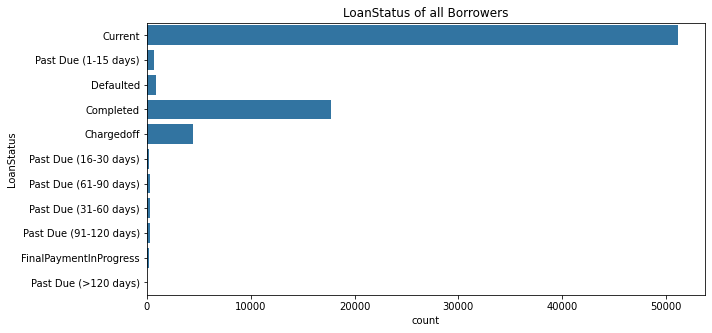

In [16]:
creat_count_plot("LoanStatus of all Borrowers", df, "LoanStatus")

- most of the the people have 'Current'. 'Completed' or 'Chargedoff' as their LoanStatus
- on a whole, few people are Past Due 

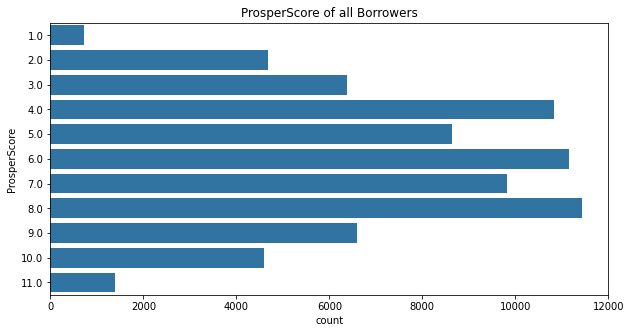

In [17]:
creat_count_plot("ProsperScore of all Borrowers", df, "ProsperScore")

This looks like a normal disrbution

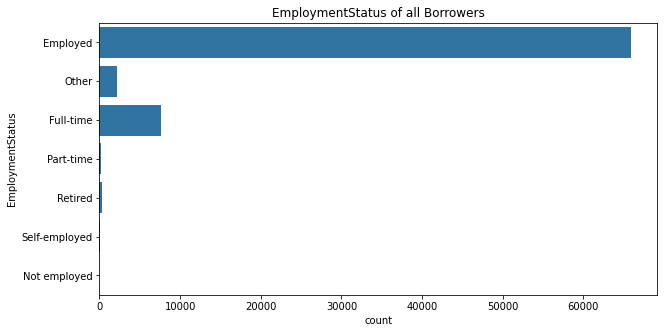

In [18]:
creat_count_plot("EmploymentStatus of all Borrowers", df, "EmploymentStatus")

- most of the the people have are employed or work full-time.  
- very few are retired, work part-time etc.

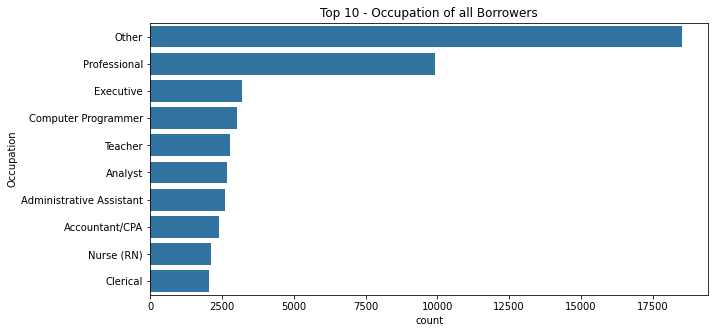

In [19]:
#'Occupation'
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df, y = 'Occupation', color = base_color,
             order = df['Occupation'].value_counts().head(10).index );
plt.title("Top 10 - Occupation of all Borrowers");

- interesting that a lot of people have put as an Occupation 'Other'. Maybe not enough options were given as a profession?

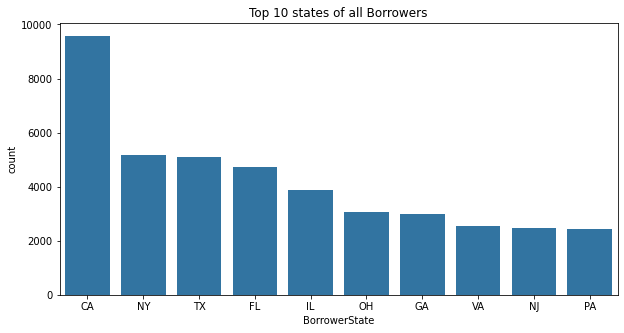

In [20]:
# BorrowerState
plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'BorrowerState', color = base_color,
             order = df['BorrowerState'].value_counts().head(10).index );
plt.title("Top 10 states of all Borrowers");

- most borrowers come from NY & CA - where it is known to be very expensive

In [21]:
df['IncomeRange'].value_counts()

$50,000-74,999    23696
$25,000-49,999    21422
$100,000+         13980
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

In [22]:
df['BorrowerState'].value_counts().head(10)

CA    9575
NY    5184
TX    5086
FL    4739
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2466
PA    2417
Name: BorrowerState, dtype: int64

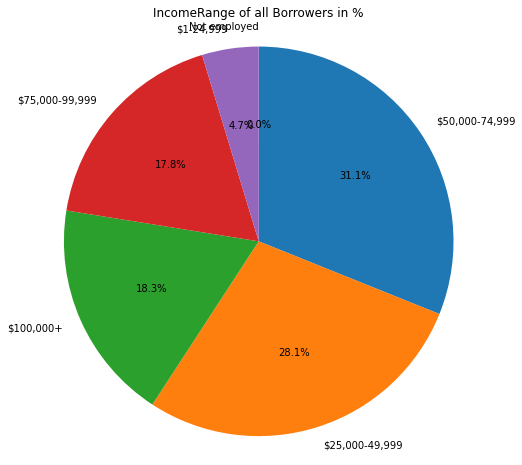

In [23]:
plt.figure(figsize = [15, 8])
sorted_counts = df['IncomeRange'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, 
        wedgeprops = {'width' : 1}, 
        autopct   = '%.1f%%'
        ),
plt.title("IncomeRange of all Borrowers in %")
plt.axis('square');

blue, 31%: majority of people earn $50000-74999 dollars

In [24]:
print(df.shape)
df.loc[df["StatedMonthlyIncome"]< 20000].shape

(76224, 18)


(75367, 18)

as you can see, the majority of people (75359/76216) have a StatedMonthlyIncome of below 20000. Above, there are few people with a wide range of high incomes. For a histogramm, it is nicer to look at the  StatedMonthlyIncome  below 20000

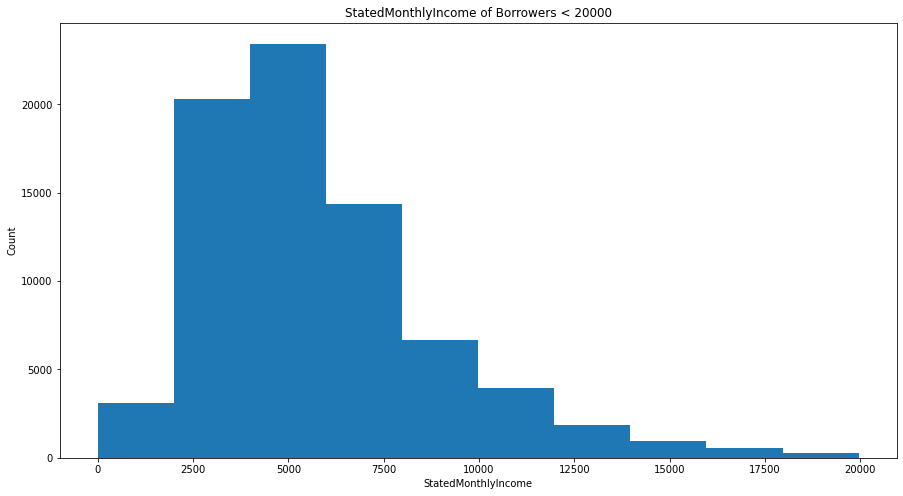

In [25]:
plt.figure(figsize = [15, 8])
df_sub = df.loc[df["StatedMonthlyIncome"]< 20000]
plt.hist(data = df_sub, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome of Borrowers < 20000") ;

- majority of monthly income around $5000

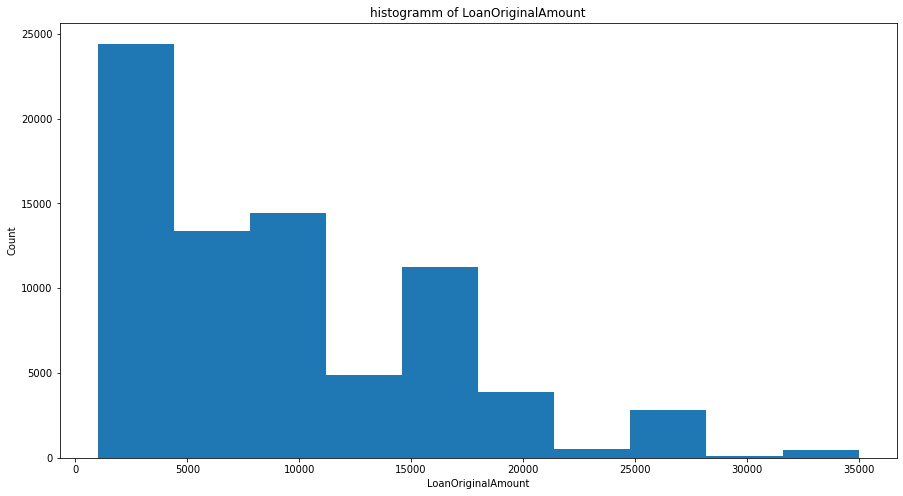

In [26]:
plt.figure(figsize = [15, 8])
plt.hist(data = df, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title("histogramm of LoanOriginalAmount") ;

- most people get a loan of around $5000
- there is another peak between ~$15000  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 1.1, 'Jointplot of MonthlyLoanPayment & StatedMonthlyIncome')

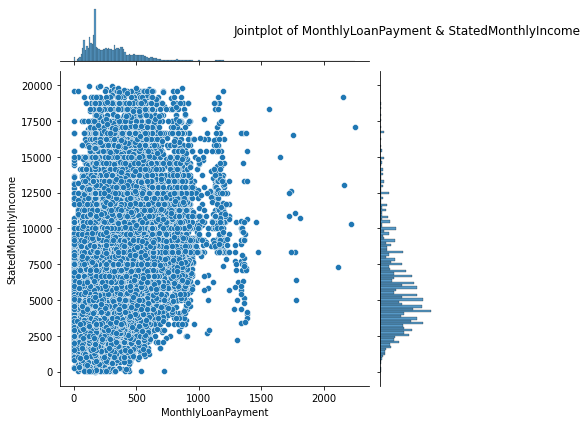

In [27]:
sb.jointplot(x='MonthlyLoanPayment',y='StatedMonthlyIncome',data=df.loc[df["StatedMonthlyIncome"]< 20000],kind='scatter')
plt.title("Jointplot of MonthlyLoanPayment & StatedMonthlyIncome", y=1.1)

- even with higher income, a lot of people get small loans

<AxesSubplot:title={'center':'ProsperScore vs StatedMonthlyIncome'}, xlabel='ProsperScore', ylabel='StatedMonthlyIncome'>

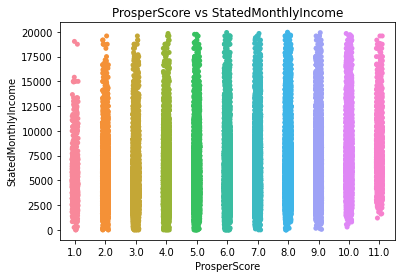

In [28]:
plt.title("ProsperScore vs StatedMonthlyIncome")
sb.stripplot(x="ProsperScore", y="StatedMonthlyIncome", data=df.loc[df["StatedMonthlyIncome"]< 20000],jitter=True)

- ProsperScore varying for all ranges of income

<AxesSubplot:title={'center':'ProsperScore vs StatedMonthlyIncome'}, xlabel='ProsperScore', ylabel='StatedMonthlyIncome'>

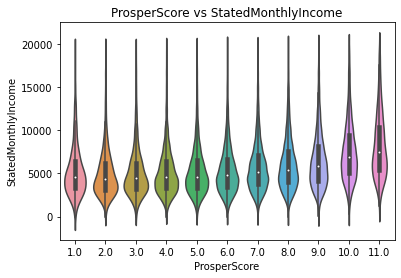

In [29]:
plt.title("ProsperScore vs StatedMonthlyIncome")
sb.violinplot(x="ProsperScore", y="StatedMonthlyIncome", data=df.loc[df["StatedMonthlyIncome"]< 20000])

- here it becomes more visible that higher incomes have a better ProsperScore

In [30]:
numeric_vars = df.select_dtypes(include=["int64", "float64"])

Text(0.5, 3.2, 'Pairplot of BorrowerAPR, BorrowerRate, EstimatedEffectiveYield')

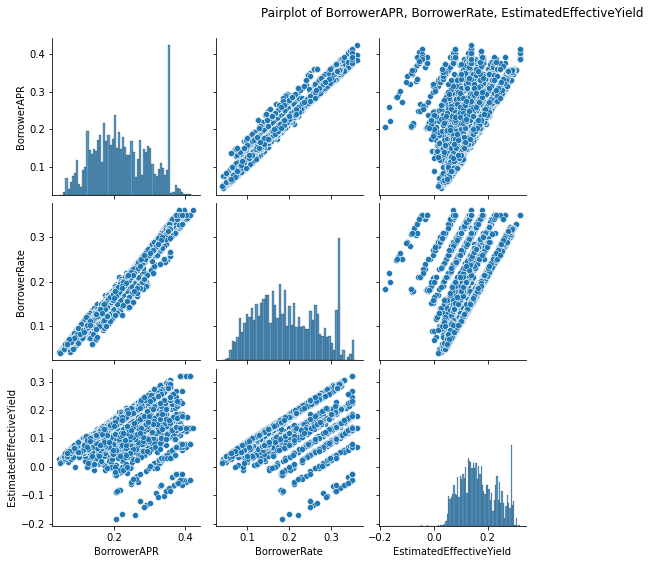

In [31]:
sb.pairplot(numeric_vars[["BorrowerAPR", "BorrowerRate", "EstimatedEffectiveYield"]])
plt.title("Pairplot of BorrowerAPR, BorrowerRate, EstimatedEffectiveYield",y = 3.2)

The diagonal plots show  marginal distribution of the data in each column.

These plots clearly show that BorrowerAPR, BorrowerRate and EstimatedEffectiveYield all correlate positive with each other

<AxesSubplot:title={'center':'BorrowerAPR vs BorrowerRate'}, xlabel='BorrowerAPR', ylabel='BorrowerRate'>

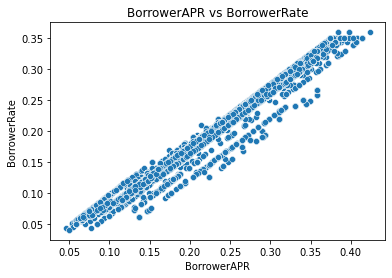

In [32]:
plt.title('BorrowerAPR vs BorrowerRate')
sb.scatterplot(x='BorrowerAPR',y='BorrowerRate',data=numeric_vars)

as BorrowerRate increasesm BorrowerAPR increases

<AxesSubplot:title={'center':'StatedMonthlyIncome vs MonthlyLoanPayment'}, xlabel='StatedMonthlyIncome', ylabel='MonthlyLoanPayment'>

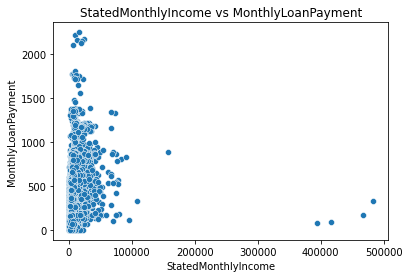

In [33]:
plt.title('StatedMonthlyIncome vs MonthlyLoanPayment')
sb.scatterplot(x='StatedMonthlyIncome',y='MonthlyLoanPayment',data=numeric_vars)

even with small incomes, there are partly very high MonthlyLoandPayments

<AxesSubplot:title={'center':'StatedMonthlyIncome vs LoanOriginalAmount'}, xlabel='StatedMonthlyIncome', ylabel='LoanOriginalAmount'>

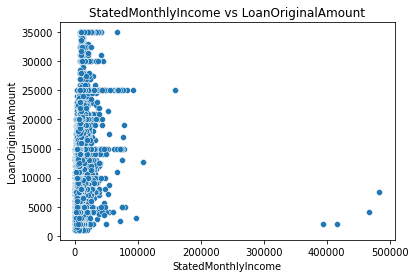

In [34]:
plt.title('StatedMonthlyIncome vs LoanOriginalAmount')
sb.scatterplot(x='StatedMonthlyIncome',y='LoanOriginalAmount',data=numeric_vars)

even with small Stated Monthly Income, high Loans were taken. With high loans, monthly payments are higher which fits to the graph above

Text(0.5, 1.0, 'Income Range vs Loan Amount')

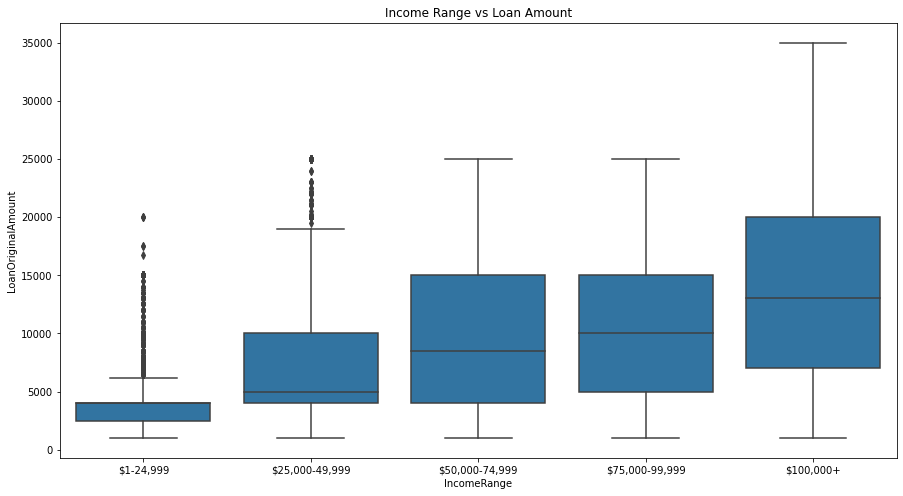

In [49]:
plt.figure(figsize = [15, 8]) #define figsize

# right plot: box plot
sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', color = base_color, order = [
"$1-24,999",   
"$25,000-49,999",
"$50,000-74,999", 
"$75,000-99,999",
"$100,000+"]
)
plt.title('Income Range vs Loan Amount')

- the upper and lower quartils are close together for the the income $1-24.999 whereas for $50.000-74.99, the upper and lower quartils are relatively far apart. 
- $1-24.999 has the most outliers
- the median of $25,000-49,99 is in the lower quartile, exactly at $5000(see cell below)

In [54]:
df.loc[df["IncomeRange"] == "$25,000-49,999"]["LoanOriginalAmount"].median()

5000.0

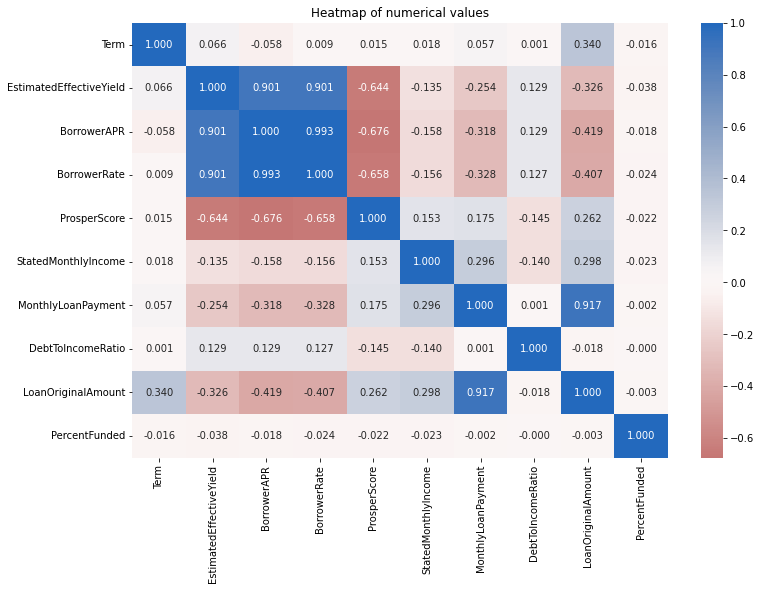

In [36]:
# correlation plot
plt.figure(figsize = [12, 8])
sb.heatmap(numeric_vars.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Heatmap of numerical values');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- BorrowerAPR & BorrowerRate clear positive correlation
- no clear correlation between StatedMonthlyIncome & MonthlyLoanPayment. Also people who have stated a smaller salary have high MonthlyLoanPayment. People with high salary have even taken relatively small MonthlyLoanPaymens. Outliers in StatedMonthlyIncome visible
- - no clear correlation between StatedMonthlyIncome & LoanOriginalAmount. Also people who have stated a smaller salary have high LoanOriginalAmount. People with high salary have even taken relatively small loans. Fits to what we have seen before.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- people with very high salaries did not take huge loans even though they could affort it

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

c:\Work\MyTasks\Green Gas\greengas\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 5, 'DebtToIncomeRatio vs ProsperScore')

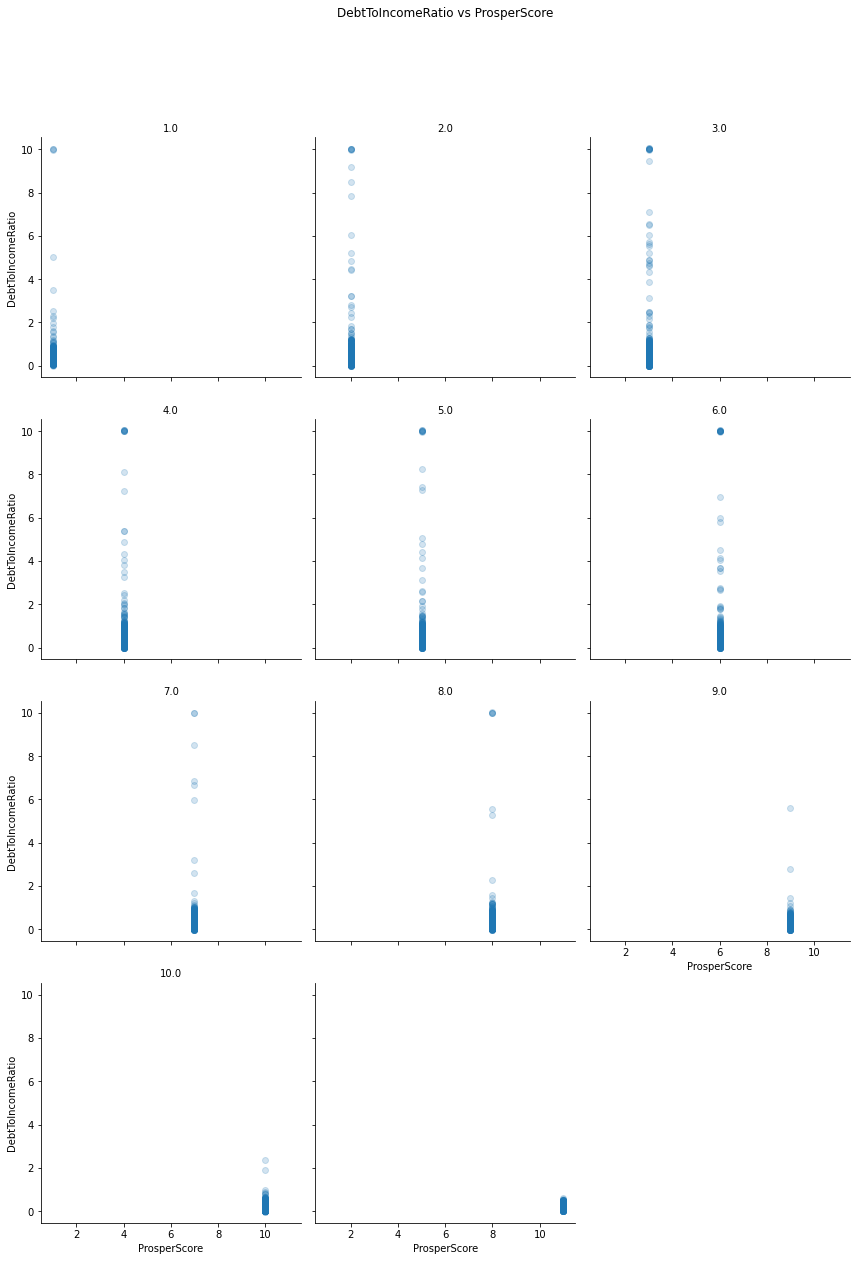

In [71]:

# plotting
g = sb.FacetGrid(data = df, col = 'ProsperScore', size = 4, col_wrap = 3)
g.map(sb.regplot, 'ProsperScore', 'DebtToIncomeRatio', y_jitter = 0.04, fit_reg = False,
scatter_kws = {'alpha' : 1/5})
g.set_ylabels('DebtToIncomeRatio')
g.set_xlabels('ProsperScore')
g.set_titles('{col_name}') 

plt.title("DebtToIncomeRatio vs ProsperScore", y=5)

- graph shows clearly that if a prosper score of 11 is reached (bottom right), the debt to income ratio is very low
- the lower the ProsoperScore, the higher the DebtToIncome ratio


Text(0.5, 1.0, 'LoanOriginalAmount vs IncomeRange')

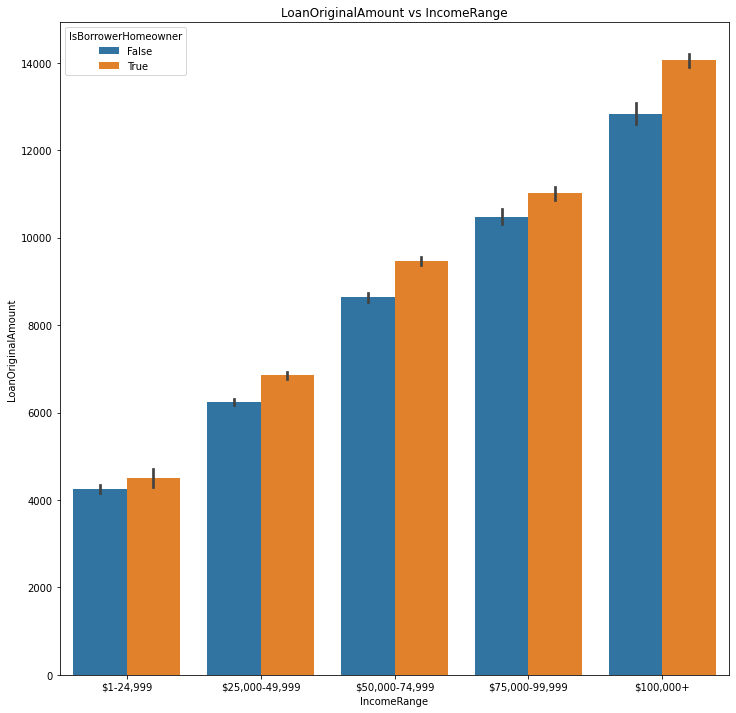

In [66]:
plt.figure(figsize = [12, 12])
sb.barplot(data=df, x = "IncomeRange", y = "LoanOriginalAmount", hue = "IsBorrowerHomeowner", dodge = True, order = [
"$1-24,999",   
"$25,000-49,999",
"$50,000-74,999", 
"$75,000-99,999",
"$100,000+"]
)

plt.title("LoanOriginalAmount vs IncomeRange")

- here we can see that the ratio between Homeowner True/False is around 50/50 for each IncomeRange

Text(0.5, 1.0, 'LoanOriginalAmount vs IncomeRange')

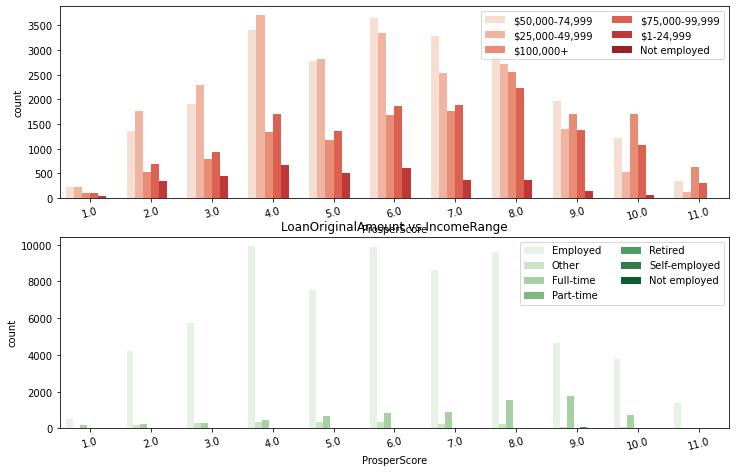

In [67]:

categoric_vars = ['EmploymentStatus', 'ProsperScore', 'IncomeRange']

plt.figure(figsize = [12, 12])


# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'ProsperScore', hue = 'IncomeRange', palette = 'Reds')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation = 15)


# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 15)

- prosper score estimates the probability of a loan going “bad,” where “bad” is the probability of going 60+ days past due within the first twelve months from the date of loan origination. One is the worst, 11 the best score.

In the above graph, we can seee that "Not employed" practically never received an 11 (very good) which is not surprising. On the other hand, surprisingly a lot of people which a very high  income ($100000+) only received a 6 in their credit score. Also, a lot of people with a low income ($1-$24.999) got a credit score that is okay. This is most likely because the amount they loaned was rather low.

The below graph shows that the number of employed people dominate in all credit scores. This is simply because most people in the dataset are employed. On score 11, it is interesting that visibly, only employed people got that score. Some self-employed earn a lot of money but there are very few them, hence, not visible in the graph.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> A heatmap is a very powerful plot. We can easily identify columns that have a positive- & negative correlation or do not correlate at all.

Columns which have a positive correlation are for example:

- Borrower APR (annual percentage rate) & Borrower Rate have a positve correlation
- Borrower APR & EstimatedEffectedYield have a positive correlation


Borrower APR and ProsperRating_Numeric have a negative correlation. Borrower APR & ListCategory Numeric do not seem to correlate

### Were there any interesting or surprising interactions between features?

> It was surpring that a lot of people, no matter of the income, got a loan of $5000!

# Conclusions

* **EmploymentStatus** majority of people work full time
* **IncomeRange**: 31% of people earn $50000-74999 dollars
* **ProsperScore**: normal distribution

* **StatedMonthlyIncome:**	
 Monthly Income is right skewed: very few people be have a higher salary. Majority of the borrowers are having a salary with less than 10000 USD and, peak is observed at 5000 USD

* **LoanOriginalAmount:** Right skewed with multiple peaks observed around 4000 USD, 10000 USD and 17000 USD.


Columns which have a positive correlation are for example:

- Borrower APR (annual percentage rate) & Borrower Rate have a positve correlation
- Borrower APR & EstimatedEffectedYield have a positive correlation


Borrower APR and ProsperRating_Numeric have a negative correlation. Borrower APR & ListCategory Numeric do not seem to correlate.



Credits:

Thank you from https://github.com/shravankoninti/Udacity_DataAnalyst/tree/master/Project_5_Visualization who solved this project very well and whos code helped me once I was stuck!